In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('./data.csv', delimiter=";")
data.head()

,Location,Team,Type of collaboration,design,ideation,modeling,reflection,project management,physical task,parallel experience
0,Remote,yes,remote collaboration (none design): remote exp...,no,No ideation ideation,No modeling,no,no,yes,no
1,Remote,yes,remote collaboration (none design): remote exp...,no,No ideation ideation,No modeling,no,no,yes,no
2,Remote,yes,remote collaboration (none design): remote gue...,no,No ideation ideation,No modeling,no,no,yes,no
3,Remote,yes,"One-way, video mediated remote collaboration (...",no,No ideation ideation,No modeling,no,no,yes,no
4,Remote,yes,remote collaboration (none design): remote hel...,no,No ideation ideation,No modeling,no,no,yes,no


In [3]:
# Type the columns you want to remove here
removeColumns = ['Type of collaboration']


# End
data = data.drop(removeColumns, axis=1)

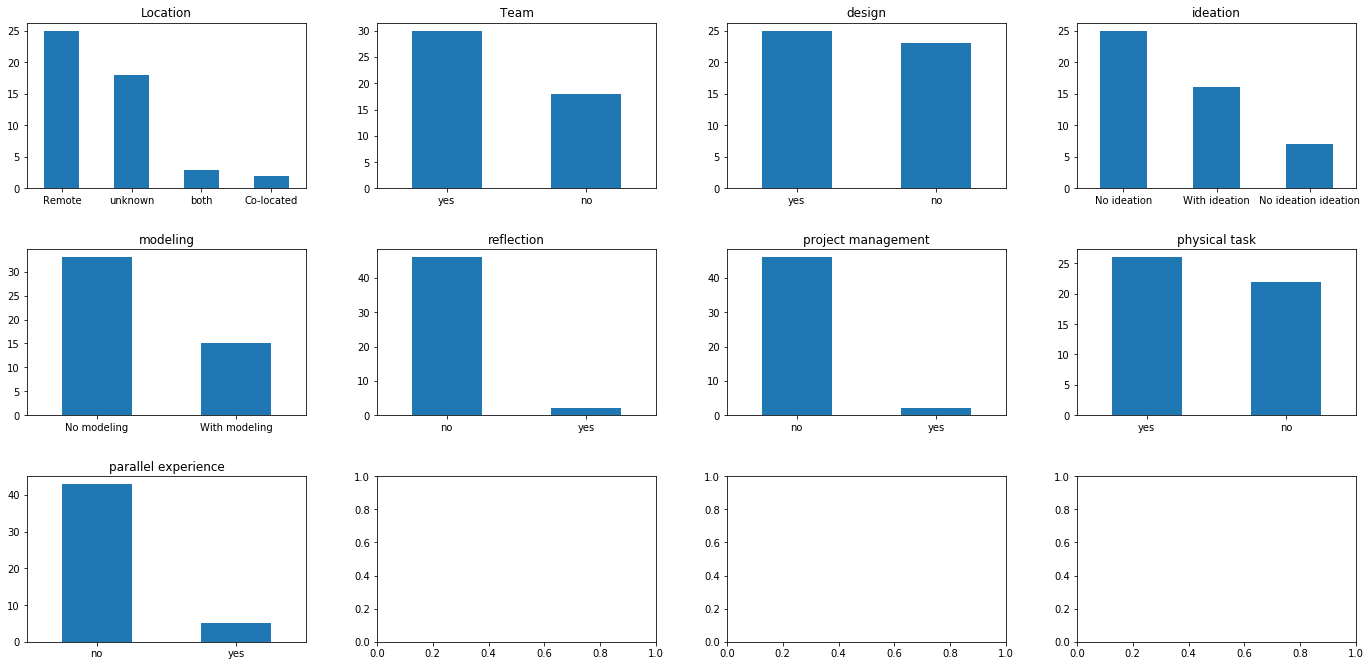

In [4]:
rowSize = 4;
nrColumns = math.ceil(len(data.columns) / rowSize)
fig, axes = plt.subplots(nrows=nrColumns, ncols=rowSize, figsize=(20, 10))
fig.tight_layout(pad=4.0)

index = 0;
for (columnName, columnData) in data.iteritems():
    # Fetch axis
    row = math.floor(index / rowSize);
    col = index % rowSize; 
    axis = axes[row,col]

    # Plot
    data[columnName].value_counts().plot.bar(title=columnName, ax=axis)   
    
    for tick in axis.get_xticklabels():
        tick.set_rotation(0)
        
    index = index + 1

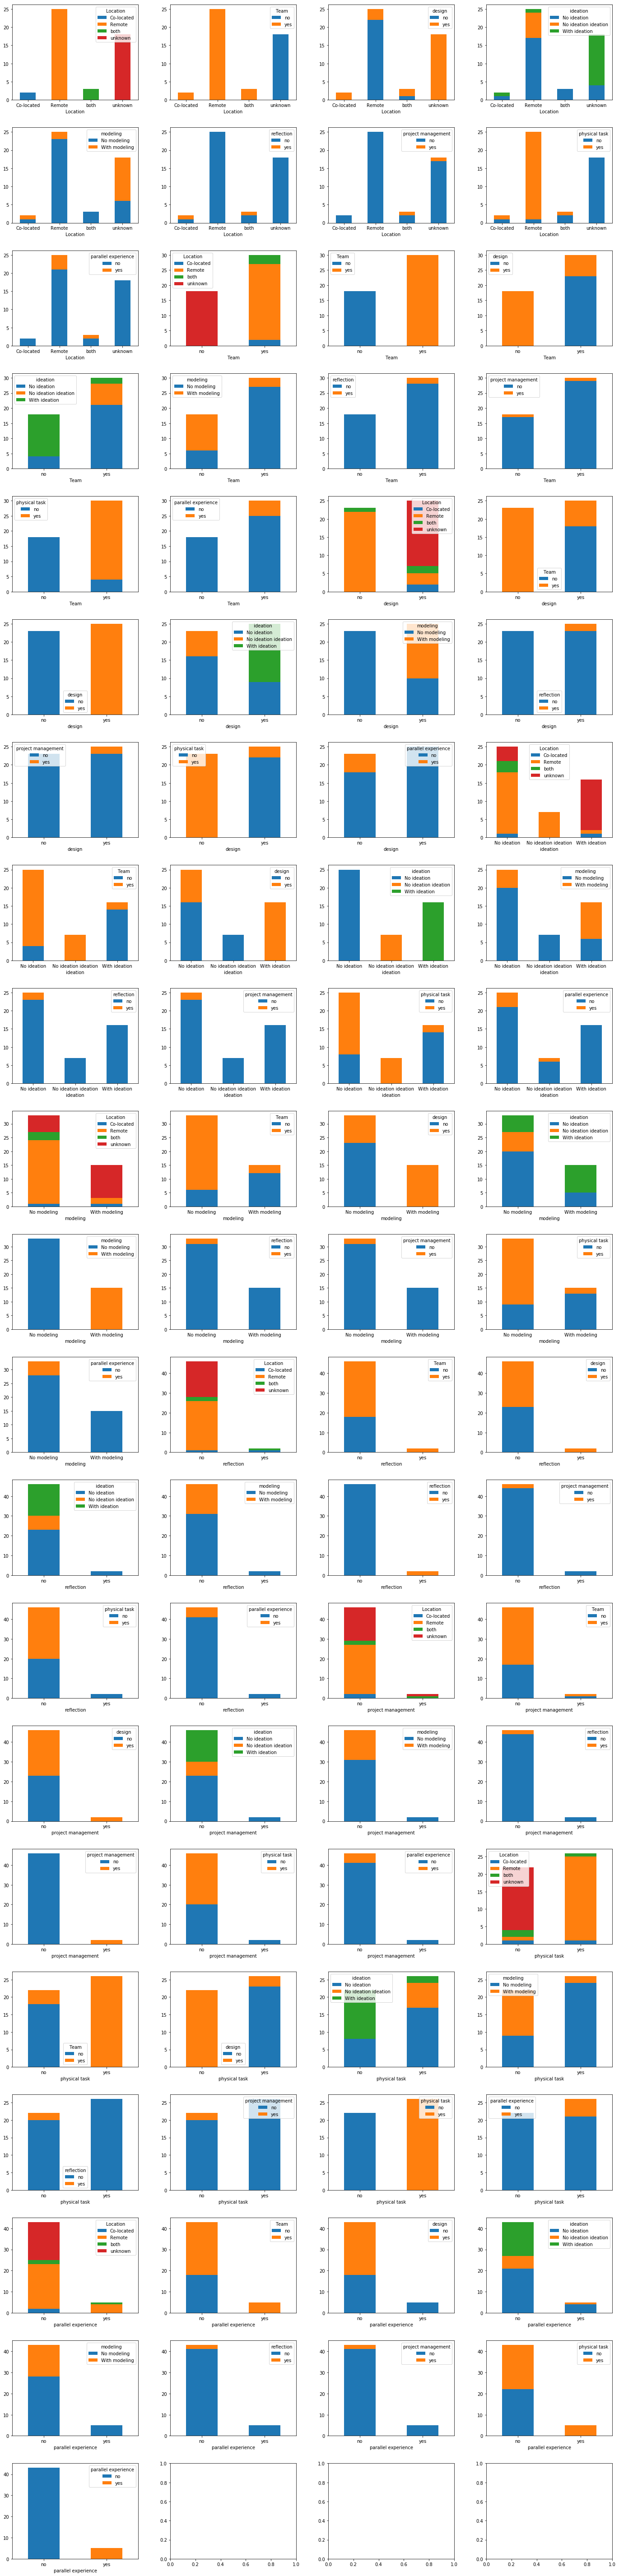

In [32]:
crossColumnCount = len(data.columns) * len(data.columns)
nrCrossColumns = math.ceil(crossColumnCount / rowSize)

fig, axes = plt.subplots(nrows=nrCrossColumns, ncols=rowSize, figsize=(20, 80))
fig.tight_layout(pad=4.0)

index = 0
for (columnName1, columnData1) in data.iteritems():
    for (columnName2, columnData2) in data.iteritems():
        # Title
        title = columnName1 + ' x ' + columnName2;
        
        # Fetch axis
        row = math.floor(index / rowSize);
        col = index % rowSize; 
        axis = axes[row,col]

        # Plot    
        pd.crosstab(data[columnName1], data[columnName2]).plot(ax=axis, kind='bar', stacked=True, rot=0) 
        
        index = index + 1